In [8]:
!pip install pytesseract pillow speechrecognition pydub
!apt install tesseract-ocr -y
!pip install pytesseract opencv-python
!apt install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ind
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 537 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 537 kB in 1s (501 kB/s)
Selecting previously unselected package tesseract-ocr-ind.
(Reading database ... 126101 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-ind_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-ind (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-in

In [9]:
import pytesseract
import speech_recognition as sr
from PIL import Image
from pydub import AudioSegment
from IPython.display import display, Audio
from google.colab import files
import os

In [14]:
print("Pilih mode ekstraksi:")
print("1. Gambar (OCR)")
print("2. Audio (Speech to Text)")
mode = input("Masukkan pilihan (1 atau 2): ")

Pilih mode ekstraksi:
1. Gambar (OCR)
2. Audio (Speech to Text)
Masukkan pilihan (1 atau 2): 1


Silakan upload gambar (JPG/PNG)...


Saving 1200x600-kata-mutiara-di-hari-pahlawan-dari-quotes-bj-habibie-yang-penuh-inspirasi-dan-motivasi-untuk-generasi-muda-221109p.jpg to 1200x600-kata-mutiara-di-hari-pahlawan-dari-quotes-bj-habibie-yang-penuh-inspirasi-dan-motivasi-untuk-generasi-muda-221109p.jpg


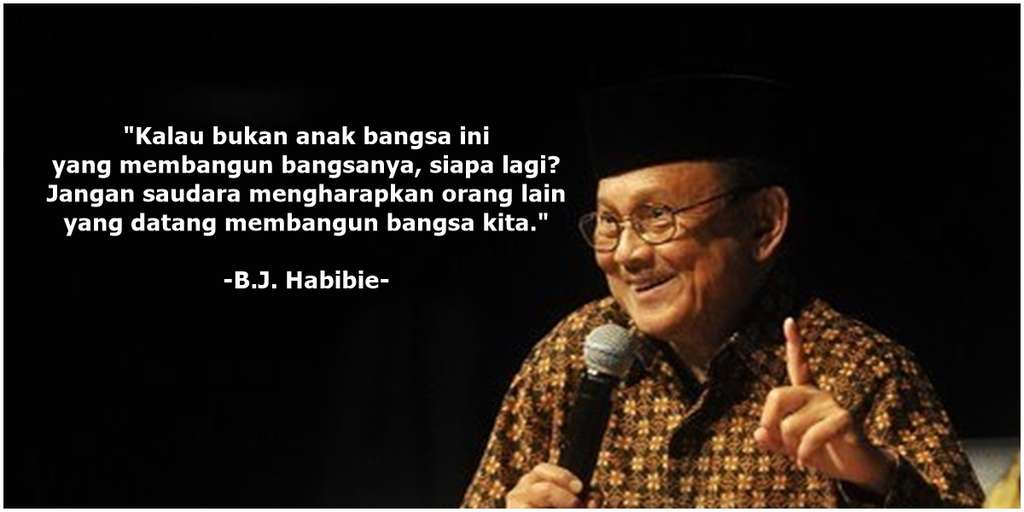


=== Hasil Ekstraksi Teks dari Gambar ===

“Kalau bukan anak bangsa ini
yang membangun bangsanya, siapa lagi?
Jangan saudara mengharapkan orang lain
yang datang membangun bangsa kita."

-B.J. Habibie-

 



In [15]:
if mode == '1':
    # ========== OCR (Gambar) ==========
    print("Silakan upload gambar (JPG/PNG)...")
    uploaded = files.upload()
    img_name = list(uploaded.keys())[0]

    # Tampilkan gambar
    img = Image.open(img_name)
    display(img)

    # Jalankan OCR (bahasa default: Indonesia)
    text = pytesseract.image_to_string(img, lang='ind')
    print("\n=== Hasil Ekstraksi Teks dari Gambar ===\n")
    print(text)

elif mode == '2':
    # ========== Speech Recognition (Audio) ==========
    print("Silakan upload file audio (WAV atau MP3)...")
    uploaded = files.upload()
    audio_file = list(uploaded.keys())[0]

    # Konversi ke wav jika perlu
    if audio_file.endswith('.mp3'):
        sound = AudioSegment.from_mp3(audio_file)
        audio_wav = audio_file.replace('.mp3', '.wav')
        sound.export(audio_wav, format='wav')
    elif audio_file.endswith('.wav'):
        audio_wav = audio_file
    else:
        raise ValueError("Format tidak didukung. Gunakan .mp3 atau .wav")

    # Tampilkan audio player
    display(Audio(audio_wav))

    # Ekstraksi teks
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_wav) as source:
        print("Mendengarkan audio...")
        audio_data = recognizer.record(source, duration=60)
        print("Mengenali teks...")
        try:
            hasil = recognizer.recognize_google(audio_data, language="id-ID")
            print("\n=== Hasil Ekstraksi Teks dari Audio ===\n")
            print(hasil)
        except sr.UnknownValueError:
            print("Google tidak dapat memahami audio.")
        except sr.RequestError as e:
            print(f"Error dari Google API: {e}")

else:
    print("Pilihan tidak valid.")